In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fifa_df = pd.read_csv('../preprocessing/clean_data.csv').set_index('ID')
fifa_df.head()

,name,full_name,club,special,age,league,height_cm,weight_kg,body_type,nationality,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
ID,,,,,,,,,,,,,,,,,,,,,
20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,2228,32,Spanish Primera División,185.0,80.0,Lean,Portugal,...,False,False,False,False,False,False,False,False,False,False
158023,L. Messi,Lionel Messi,FC Barcelona,2158,30,Spanish Primera División,170.0,72.0,Lean,Argentina,...,False,False,False,False,False,False,False,False,False,False
190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,2100,25,French Ligue 1,175.0,68.0,Lean,Brazil,...,False,False,False,False,False,False,False,False,False,False
176580,L. Suárez,Luis Suárez,FC Barcelona,2291,30,Spanish Primera División,182.0,86.0,Normal,Uruguay,...,False,False,False,False,False,False,False,False,False,False
167495,M. Neuer,Manuel Neuer,FC Bayern Munich,1493,31,German Bundesliga,193.0,92.0,Normal,Germany,...,False,False,False,False,False,False,False,False,False,True


In [2]:
numerical_variables = ['eur_value', 'eur_wage', 'eur_release_clause','age', 'height_cm', 'weight_kg', 'ID', 'special', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']

categorical_variables = [c for c in fifa_df.columns if c not in numerical_variables]
numerical_variables = [c for c in numerical_variables if c in fifa_df.columns]
categorical_name_variables = ['body_type', 'work_rate_att', 'work_rate_def', 'preferred_foot', 'nationality', 'league', 'special']

### Procurando pelos goleiros de maior sucesso

In [3]:
original_positions = 'rs, rw, rf, ram, rcm, rm, rdm, rcb, rb, rwb, st, lw, cf, cam, cm, lm, cdm, cb, lb, lwb, ls, lf, lam, lcm, ldm, lcb, gk'
original_positions = original_positions.replace(' ', '').split(',')

In [4]:
fifa_df['best_pos'] = fifa_df[original_positions].idxmax(axis='columns')
gk_df = fifa_df[fifa_df.best_pos == 'gk']
print(gk_df.shape)
gk_df.head()

(2021, 180)


,name,full_name,club,special,age,league,height_cm,weight_kg,body_type,nationality,...,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,best_pos
ID,,,,,,,,,,,,,,,,,,,,,
167495,M. Neuer,Manuel Neuer,FC Bayern Munich,1493,31,German Bundesliga,193.0,92.0,Normal,Germany,...,False,False,False,False,False,False,False,False,True,gk
193080,De Gea,David De Gea Quintana,Manchester United,1458,26,English Premier League,193.0,76.0,Lean,Spain,...,False,False,False,False,False,False,False,False,True,gk
192119,T. Courtois,Thibaut Courtois,Chelsea,1282,25,English Premier League,199.0,94.0,Lean,Belgium,...,False,False,False,False,False,False,False,False,True,gk
1179,G. Buffon,Gianluigi Buffon,Juventus,1335,39,Italian Serie A,191.0,94.0,Lean,Italy,...,False,False,False,False,False,False,False,False,True,gk
200389,J. Oblak,Jan Oblak,Atlético Madrid,1290,24,Spanish Primera División,189.0,82.0,Normal,Slovenia,...,False,False,False,False,False,False,False,False,True,gk


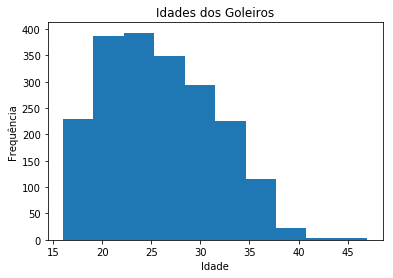

In [5]:
#visualização do histograma das idades visando estimar um limiar de idade entre veteranos e calouros
gk_df.age.plot(kind='hist')
plt.title('Idades dos Goleiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.savefig('3-histograma_idade.eps', format='eps', bbox_inches='tight')

In [6]:
# Retirando informações que não serão utilizadas para computar a distância
to_drop = [v for v in numerical_variables if 'prefers' in v]
to_drop =['name', 'full_name', 'club', 'league', 'eur_release_clause']+to_drop
numerical_variables.remove('eur_release_clause')

gk_df.drop(to_drop, axis='columns', inplace=True)

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# Normalizando os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
gk_df[numerical_variables] = scaler.fit_transform(gk_df[numerical_variables])
gk_df[numerical_variables].head()

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dcandrade/.anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,eur_value,eur_wage,age,height_cm,weight_kg,special,overall,potential,pac,sho,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
ID,,,,,,,,,,,,,,,,,,,,,
167495,0.945736,1.000000,0.483871,0.636364,0.64,1.000000,1.000000,0.958333,1.000000,0.980769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
193080,1.000000,0.934783,0.322581,0.636364,0.32,0.954248,0.956522,0.958333,0.980769,0.884615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.956522
192119,0.914729,0.826087,0.290323,0.818182,0.68,0.724183,0.934783,0.958333,0.884615,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.934783
1179,0.069767,0.478261,0.741935,0.575758,0.68,0.793464,0.934783,0.895833,0.961538,0.942308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.934783
200389,0.883721,0.356522,0.258065,0.515152,0.44,0.734641,0.913043,0.979167,0.865385,0.980769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913043


In [8]:
gk_df = pd.get_dummies(gk_df)

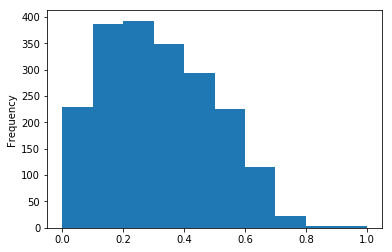

In [9]:
gk_df.age.plot(kind='hist')

#### Escolhendo o limiar de idade = 25 anos

In [10]:
# Separando veteranos dos calouros
veteran_gks = gk_df[gk_df.age > 0.2] ## 25 =0.2 apos a normalizacao
fresh_gks = gk_df[gk_df.age <= 0.2]

In [11]:
## obtendo os goleiros de maior sucesso. o sucesso é medido pelo valor do eur_value (valor do jogador)
veteran_gks.sort_values('eur_value', axis=0, ascending=False, inplace=True)
best_gks = veteran_gks.head(6) # Pegando os 5 goleiros de maior sucesso (ta 6 pq tem um repetido)
best_gks

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,special,age,height_cm,weight_kg,eur_value,eur_wage,overall,potential,pac,sho,...,nationality_Ukraine,nationality_United States,nationality_Uruguay,nationality_Venezuela,nationality_Wales,work_rate_att_Medium,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right,best_pos_gk
ID,,,,,,,,,,,,,,,,,,,,,
193080,0.954248,0.322581,0.636364,0.32,1.000000,0.934783,0.956522,0.958333,0.980769,0.884615,...,0,0,0,0,0,1,1,0,1,1
167495,1.000000,0.483871,0.636364,0.64,0.945736,1.000000,1.000000,0.958333,1.000000,0.980769,...,0,0,0,0,0,1,1,0,1,1
192119,0.724183,0.290323,0.818182,0.68,0.914729,0.826087,0.934783,0.958333,0.884615,1.000000,...,0,0,0,0,0,1,1,1,0,1
200389,0.734641,0.258065,0.515152,0.44,0.883721,0.356522,0.913043,0.979167,0.865385,0.980769,...,0,0,0,0,0,1,1,0,1,1
167948,0.771242,0.451613,0.484848,0.44,0.589147,0.717391,0.913043,0.875000,0.942308,0.903846,...,0,0,0,0,0,1,1,1,0,1
192448,0.713725,0.290323,0.454545,0.50,0.550388,0.673913,0.847826,0.895833,0.865385,0.846154,...,0,0,0,0,0,1,1,0,1,1


In [12]:
fresh_gks.head()

,special,age,height_cm,weight_kg,eur_value,eur_wage,overall,potential,pac,sho,...,nationality_Ukraine,nationality_United States,nationality_Uruguay,nationality_Venezuela,nationality_Wales,work_rate_att_Medium,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right,best_pos_gk
ID,,,,,,,,,,,,,,,,,,,,,
230621,0.703268,0.064516,0.727273,0.60,0.441860,0.152174,0.782609,1.000000,0.942308,0.750000,...,0,0,0,0,0,1,1,0,1,1
206585,0.626144,0.193548,0.484848,0.46,0.240310,0.086957,0.739130,0.854167,0.750000,0.807692,...,0,0,0,0,0,1,1,0,1,1
226753,0.815686,0.161290,0.454545,0.62,0.170543,0.034783,0.695652,0.812500,0.846154,0.730769,...,0,0,0,0,0,1,1,0,1,1
221087,0.705882,0.193548,0.515152,0.34,0.155039,0.082609,0.695652,0.770833,0.711538,0.730769,...,0,0,0,0,0,1,1,1,0,1
231691,0.583007,0.064516,0.636364,0.44,0.178295,0.043478,0.673913,0.895833,0.750000,0.730769,...,0,0,0,0,0,1,1,0,1,1


In [13]:
# Medidon a distância euclidiana entre cada goleiro novato e cada goleiro veterano
from sklearn.metrics.pairwise import pairwise_distances
labels = list(best_gks.index.values)
dists = pd.DataFrame(pairwise_distances(fresh_gks, best_gks))
dists.columns = labels
dists.index = fresh_gks.index
dists.head()

,193080,167495,192119,200389,167948,192448
ID,,,,,,
230621,3.378498,2.913670,3.232986,2.261603,3.202219,2.308393
206585,2.560974,3.548001,2.654711,2.722683,3.365572,3.008369
226753,3.280041,3.480157,3.529536,3.242137,3.408577,2.954357
221087,2.859536,4.026482,2.677126,3.382693,2.906975,3.322350
231691,3.052908,3.598731,3.127530,3.158576,2.667024,2.837986


In [14]:
# Associando cada goleiro novato ao goleiro veterano mais próximo.
# os goleiros novatos foram limitados aos 50 mais proximos a algum goleiro veterano
dists['best_fit'] = dists.idxmin(axis=1)
dists['fit_value'] = dists.min(axis=1)
best_fresh_ids = dists.min(axis=1).sort_values().head(100)
best_fresh_ids.head()

ID
230621    2.261603
224041    2.430202
215213    2.506660
212247    2.530017
206585    2.560974
dtype: float64

In [15]:
# Substituindo os IDS pelos nomes dos goleiros
fresh_gks['Goleiro Referência'] = dists['best_fit'].apply(lambda x: fifa_df.loc[x]['name'])
fresh_gks['Goleiro Referência'].unique()

/home/dcandrade/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array(['J. Oblak', 'De Gea', 'M. ter Stegen', 'T. Courtois', 'H. Lloris'],
      dtype=object)

In [16]:
best_fresh = fresh_gks.loc[best_fresh_ids.index.values]
best_fresh.sort_index(inplace=True)
best_fresh['distance'] = best_fresh_ids.sort_index()
best_fresh.head()

,special,age,height_cm,weight_kg,eur_value,eur_wage,overall,potential,pac,sho,...,nationality_Uruguay,nationality_Venezuela,nationality_Wales,work_rate_att_Medium,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right,best_pos_gk,Goleiro Referência,distance
ID,,,,,,,,,,,,,,,,,,,,,
204424,0.473203,0.193548,0.363636,0.42,0.006977,0.004348,0.391304,0.500000,0.519231,0.403846,...,0,0,0,1,1,0,1,1,M. ter Stegen,3.045204
206585,0.626144,0.193548,0.484848,0.46,0.240310,0.086957,0.739130,0.854167,0.750000,0.807692,...,0,0,0,1,1,0,1,1,De Gea,2.560974
209483,0.492810,0.193548,0.424242,0.40,0.017054,0.047826,0.500000,0.625000,0.692308,0.461538,...,0,0,0,1,1,0,1,1,J. Oblak,2.604992
209750,0.569935,0.193548,0.606061,0.40,0.007752,0.008696,0.391304,0.541667,0.500000,0.480769,...,0,0,0,1,1,0,1,1,M. ter Stegen,3.028974
210599,0.471895,0.193548,0.515152,0.40,0.013953,0.060870,0.456522,0.625000,0.576923,0.423077,...,0,0,0,1,1,0,1,1,M. ter Stegen,2.980979


### Distribuição dos goleiros no espaço de características

In [17]:
# Reduzir as features em 2 para ver a distribuição de grupos
from sklearn.decomposition import PCA
pca = PCA(2)
data_pca = best_fresh.drop(['Goleiro Referência'], axis='columns')
data_pca = pca.fit_transform(data_pca)

data_pca = pd.DataFrame(data_pca, columns=['x','y'])
data_pca.index = best_fresh.index
data_pca['Goleiro Referência'] = best_fresh['Goleiro Referência']
data_pca.head()

,x,y,Goleiro Referência
ID,,,
204424,-0.216536,-0.342472,M. ter Stegen
206585,1.650176,0.348573,De Gea
209483,0.227890,-0.669516,J. Oblak
209750,-0.142867,-0.423819,M. ter Stegen
210599,-0.104514,-0.412682,M. ter Stegen


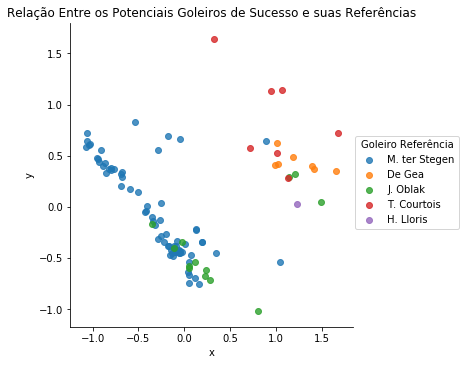

In [18]:
import seaborn as sns
#plot data with seaborn
group_plot = sns.lmplot(data=data_pca, x='x', y='y', hue='Goleiro Referência', fit_reg=False, legend=True, legend_out=True)
plt.title("Relação Entre os Potenciais Goleiros de Sucesso e suas Referências")
#plt.legend().set_title("Posição")
plt.savefig('2-goleiros2d.eps', format='eps', bbox_inches='tight')

In [19]:
# Reduzir as features em 3 para ver a distribuição de grupos
from sklearn.decomposition import PCA
pca = PCA(3)
data_pca = best_fresh.drop(['Goleiro Referência'], axis='columns')
data_pca = pca.fit_transform(data_pca)

data_pca = pd.DataFrame(data_pca, columns=['x','y', 'z'])
data_pca.index = best_fresh.index
data_pca['Goleiro Referência'] = best_fresh['Goleiro Referência']
data_pca.head()

,x,y,z,Goleiro Referência
ID,,,,
204424,-0.216536,-0.342472,-0.284783,M. ter Stegen
206585,1.650176,0.348573,0.570205,De Gea
209483,0.227890,-0.669516,0.899292,J. Oblak
209750,-0.142867,-0.423819,-0.246169,M. ter Stegen
210599,-0.104514,-0.412682,-0.234734,M. ter Stegen


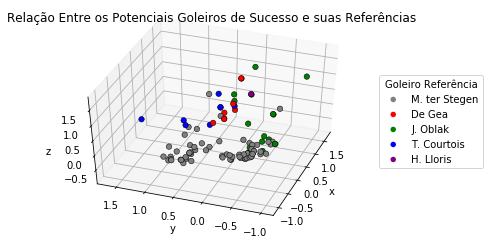

In [20]:
from mpl_toolkits import mplot3d
colors = {
    'De Gea': 'red',
    'J. Oblak': 'green',
    'T. Courtois': 'blue',
    'M. ter Stegen': 'gray',
    'H. Lloris': 'purple'
}
data_pca.reset_index(inplace=True)

data_pca['color'] = pd.Series(colors[label] for label in data_pca['Goleiro Referência'])


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_pca['x'], data_pca['y'], data_pca['z'], c=data_pca['color'], alpha=1, linewidth=0.5, s=30, edgecolors='none')

df = data_pca.drop_duplicates('Goleiro Referência')
for index, row in df.iterrows():
    ax.scatter(row['x'], row['y'], row['z'], c=row['color'] , label=row['Goleiro Referência'], alpha=1,linewidth=0.5, s=30, edgecolors='none')

#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title('Relação Entre os Potenciais Goleiros de Sucesso e suas Referências')
plt.legend(bbox_to_anchor=(1., .7), loc=2, borderaxespad=0.).set_title('Goleiro Referência')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(45, 200)
plt.savefig('2-goleiros3d.eps', format='eps', bbox_inches='tight')

### Lista dos 10 potenciais melhores goleiros e suas referências

In [21]:
best_10 = best_fresh.sort_values('distance', ascending=False).head(10)
best_10 = best_fresh.sort_values('distance', ascending=False).head(10).index.values
result = fifa_df.loc[best_10][['name', 'age', 'club', 'eur_value']]
result['Referência'] = best_fresh['Goleiro Referência']
result

,name,age,club,eur_value,Referência
ID,,,,,
212151,T. Strakosha,22,Lazio,7000000.0,De Gea
234841,G. Karačić,20,SV Sandhausen,1200000.0,M. ter Stegen
234790,Soriano,19,Sevilla Atlético,650000.0,T. Courtois
225361,L. McGee,21,Portsmouth,675000.0,M. ter Stegen
223823,T. Königsmann,20,SpVgg Greuther Fürth,350000.0,M. ter Stegen
231545,Miguel Silva,22,Vitória Guimarães,2300000.0,M. ter Stegen
230038,A. Maisonnial,19,AS Saint-Étienne,975000.0,M. ter Stegen
222829,S. Brodersen,20,FC St. Pauli,120000.0,M. ter Stegen
219260,F. Dornebusch,22,VfL Bochum,120000.0,M. ter Stegen


In [22]:
values = fifa_df[fifa_df.name.isin(result['Referência'].values)][['name','eur_value', 'club', 'age']]

In [23]:
full_result = pd.merge(values, result, right_on='Referência', left_on='name', suffixes=('_Referência', '_Recomendado')).drop('Referência', axis=1)
full_result

,name_Referência,eur_value_Referência,club_Referência,age_Referência,name_Recomendado,age_Recomendado,club_Recomendado,eur_value_Recomendado
0,De Gea,64500000.0,Manchester United,26,T. Strakosha,22,Lazio,7000000.0
1,T. Courtois,59000000.0,Chelsea,25,Soriano,19,Sevilla Atlético,650000.0
2,T. Courtois,59000000.0,Chelsea,25,A. Meret,20,Ferrara (SPAL),10500000.0
3,M. ter Stegen,35500000.0,FC Barcelona,25,G. Karačić,20,SV Sandhausen,1200000.0
4,M. ter Stegen,35500000.0,FC Barcelona,25,L. McGee,21,Portsmouth,675000.0
5,M. ter Stegen,35500000.0,FC Barcelona,25,T. Königsmann,20,SpVgg Greuther Fürth,350000.0
6,M. ter Stegen,35500000.0,FC Barcelona,25,Miguel Silva,22,Vitória Guimarães,2300000.0
7,M. ter Stegen,35500000.0,FC Barcelona,25,A. Maisonnial,19,AS Saint-Étienne,975000.0
8,M. ter Stegen,35500000.0,FC Barcelona,25,S. Brodersen,20,FC St. Pauli,120000.0
9,M. ter Stegen,35500000.0,FC Barcelona,25,F. Dornebusch,22,VfL Bochum,120000.0
